In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
k = 2
tol = 0.001
max_iter = 300

In [3]:
colors = 10*["g","r","c","b","k",'y']

In [4]:
def fit(data,k,max_iter,tol):

    centroids = {}
#     print(data)
    for i in range(k):
        centroids[i] = data[i]

    for i in range(max_iter):
        classifications = {}

        for i in range(k):
            classifications[i] = []

        for featureset in data:
            distances = [np.linalg.norm(featureset-centroids[centroid]) for centroid in centroids]
            print(distances)
            classification = distances.index(min(distances))
            classifications[classification].append(featureset)

        prev_centroids = dict(centroids)


        for classification in classifications:
            centroids[classification] = np.average(classifications[classification],axis=0)
        print(centroids)
        optimized = True

        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
            if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > tol:
                print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                optimized = False

        if optimized:
            break
    return centroids, classifications


def predict(data,centroids):
    distances = [np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
    classification = distances.index(min(distances))
    return classification  

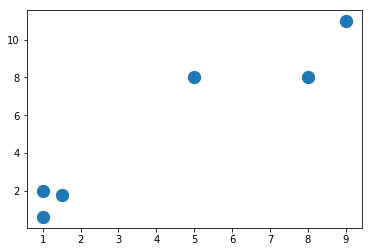

In [5]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [6]:
centroids, classifications = fit(X,k,max_iter,tol)


[0.0, 0.5385164807134504]
[0.5385164807134504, 0.0]
[7.211102550927978, 7.119691004531026]
[9.219544457292887, 8.98276126811795]
[1.4, 1.3]
[12.041594578792296, 11.869709347747316]
{0: array([1., 2.]), 1: array([4.9 , 5.88])}
453.3333333333334
[0.0, 5.501308935153525]
[0.5385164807134504, 5.310969779616526]
[7.211102550927978, 2.1223571801183696]
[9.219544457292887, 3.7555825114088486]
[1.4, 6.564175500396072]
[12.041594578792296, 6.559298743005992]
{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
102.72108843537411
[0.5587684871413404, 9.439868172337532]
[0.47140452079103173, 9.266486808806118]
[7.574885404340378, 2.5385910352879693]
[9.454040876201503, 1.2018504251546633]
[0.8825468196582483, 10.52003379800232]
[12.338782579961263, 2.6034165586355518]
{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}


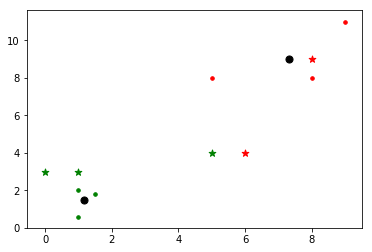

In [7]:
for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker='o', color='k', s=50)

for classification in classifications:
    color = colors[classification]
    for featureset in classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='.', color=color, s=50)

xtest = np.array([[1,3],
                  [8,9],
                  [0,3],
                  [5,4],
                  [6,4]])

for unknown in xtest:
    classification = predict(unknown,centroids)
    plt.scatter(unknown[0], unknown[1], marker='*', color=colors[classification], s=50)